## 로지스틱 회귀
- 반응 변수가 범주형인 경우에 적용하는 회귀 분석 
- 반응 변수 Y를 직접 모델링 하지 않고 Y가 특정 범주에 속하는 확률을 모델링

## ⚙️ 매개변수 (Parameters)

- **`penalty='l2'`**  
  규제 방식 선택  
  - `'l1'` : Lasso (특징 선택 효과, 일부 계수 0)  
  - `'l2'` : Ridge (계수 축소, 기본값)  
  - `'elasticnet'` : L1+L2 혼합  
  - `'none'` : 규제 없음  

- **`dual=False`**  
  쌍대 문제(dual problem) 풀지 여부 (`liblinear` solver에서만 가능).  

- **`tol=1e-4`**  
  반복 수렴 허용 오차.  

- **`C=1.0`**  
  규제 강도의 역수.  
  - 작을수록 규제 ↑ (과적합 방지)  
  - 클수록 규제 ↓ (더 유연해짐)  

- **`fit_intercept=True`**  
  절편 포함 여부.  

- **`intercept_scaling=1`**  
  solver='liblinear'에서만 사용, 절편 스케일링.  

- **`class_weight=None`**  
  클래스 불균형 처리.  
  - `'balanced'` : 클래스 빈도에 반비례 가중치 자동 부여  
  - dict : {클래스: 가중치} 직접 지정  

- **`random_state=None`**  
  난수 고정 (재현성).  

- **`solver='lbfgs'`**  
  최적화 알고리즘 선택 (문제 크기/규제에 따라 다름).  
  - `'liblinear'` : 작은 데이터, L1/L2 지원  
  - `'lbfgs'` : 다중 클래스 지원, 빠르고 안정적  L2/None 사용 가능
  - `'saga'` : 대규모 데이터, L1/L2/ElasticNet 지원  
  - `'newton-cg'`, `'sag'` : 대규모 데이터 적합  L2/None 사용 가능

- **`max_iter=100`**  
  최대 반복 횟수. (수렴 안 되면 늘려야 함)  

- **`multi_class='auto'`**  
  다중 클래스 처리 방식.  
  - `'ovr'` (One-vs-Rest)  
  - `'multinomial'` (Softmax 기반, solver 제한 있음)  
  - `'auto'` : 데이터와 solver에 맞춰 자동 선택  

- **`l1_ratio=None`**  
  ElasticNet 규제 시 L1 비중 (0~1).  

---

## 📊 속성 (Attributes)

- **`coef_`** : 학습된 계수(가중치).  
- **`intercept_`** : 절편.  
- **`classes_`** : 학습된 클래스 레이블.  
- **`n_iter_`** : 실제 반복 횟수.  

---

## 🔧 메서드 (Methods)

- **`fit(X, y)`** : 모델 학습.  
- **`predict(X)`** : 클래스 예측.  
- **`predict_proba(X)`** : 클래스별 확률 출력.  
- **`predict_log_proba(X)`** : 클래스별 로그 확률 출력.  
- **`decision_function(X)`** : 클래스 점수(선형 결합값).  
- **`score(X, y)`** : 정확도(Accuracy).  
- **`get_params()` / `set_params()`** : 하이퍼파라미터 확인/설정.  

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
## 데이터 로드 
body = pd.read_csv("./data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
## 바이너리 형태로 데이터 변환
## 이진 분류로 데이터 전처리
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
body['class_1'] = np.where(body['class'] == 'A' , 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [4]:
## 데이터 분할
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x = body[feature_columns]
y = body['class_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [5]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(x_train, y_train)

c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
## 확률 추정 로그 예측
proba = pd.DataFrame(logR.predict_proba(x_train))
## confidence score
cs = logR.decision_function(x_train)

## 두 데이터의 결합
df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(drop=True, inplace=True)

df

,Not A,A,decision_function
0,1.000000,1.348204e-08,-18.121908
1,1.000000,5.150090e-08,-16.781666
2,1.000000,8.265153e-08,-16.308632
3,1.000000,9.230457e-08,-16.198172
4,1.000000,1.270284e-07,-15.878855
...,...,...,...
9370,0.002370,9.976298e-01,6.042406
9371,0.001999,9.980014e-01,6.213285
9372,0.001753,9.982471e-01,6.344725
9373,0.000852,9.991485e-01,7.067634


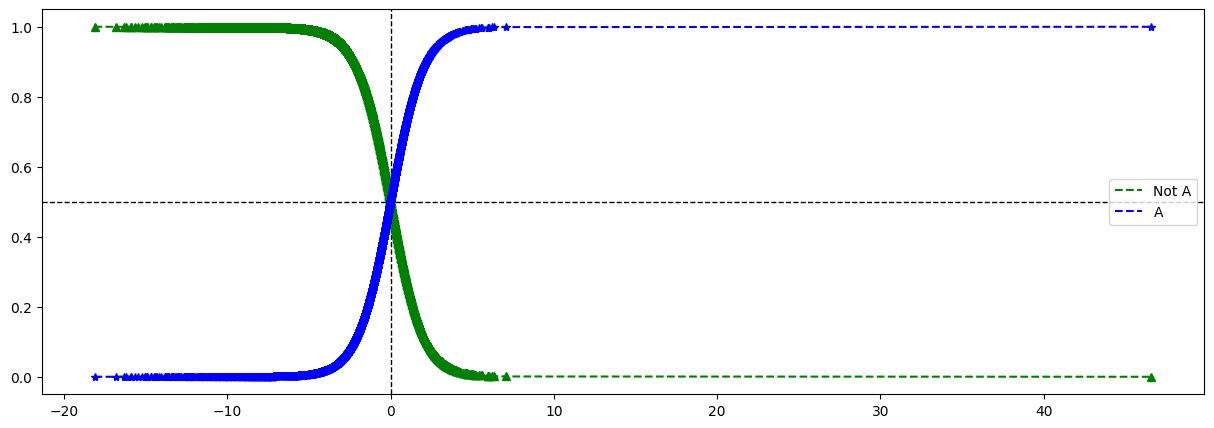

In [7]:
## confidence score를 기준으로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y = 0.5, linestyle='--', color='black', linewidth = 1)
plt.axvline(x = 0 , linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend()

plt.show()

## confidence score에 따른 클래스 확률 값을 매칭시키면 A 클래스에 속한 추정 확률과 결정경계(blue)를 얻을 수 있다. 

혼동행렬 : [[2763  251]
 [ 346  658]]
정확도 : 85.14
정밀도 : 85.14
재현율 : 65.54
F1 : 68.79


Text(0.5, 36.72222222222221, 'Predicted')

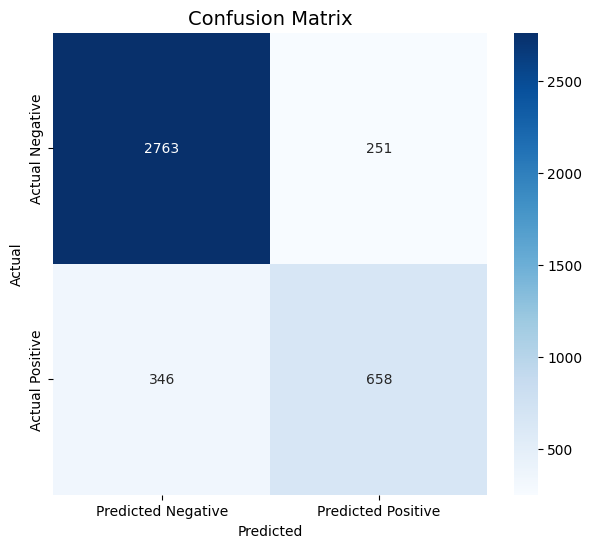

In [8]:
## 분류 모델의 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
pred = logR.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print('혼동행렬 :', test_cm)
print('정확도 :', round(test_acc*100, 2))
print('정밀도 :', round(test_acc*100, 2))
print('재현율 :', round(test_rcll*100, 2))
print('F1 :', round(test_f1*100, 2))

# 시각화
plt.figure(figsize=(7,6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.title("Confusion Matrix", fontsize=14)
plt.ylabel("Actual")
plt.xlabel("Predicted")

- 다중 클래스를 지원하는 로지스틱 회귀
- 다중 로지스틱 회귀, 소프트맥스 회귀라 한다. 

In [9]:
body  = pd.read_csv("./data/bodyPerformance.csv")

In [10]:
body['gender'] = np.where(body['gender'] == "M", 0, 1)
## 클래스는 A인 경우 0 B인 경우 1 C인 경우 2 D인 경우 3
mapping = {
    'A' : 0, 
    'B' : 1, 
    'C' : 2, 
    'D' : 3}
body['class_2'] = body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [11]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify= y, train_size= 0.7, random_state=1)

In [12]:
## multi_class  : 클래스의 타입을 지정 ovr : 바이너리, multinomial : 다중 클래스 ,  기본값은 auto
## solver : 최적화 문제를 푸는 해를 구할 때 사용하는 알고리즘 지정 기본 값 lbfgs
## C : 정규화 강도의 역수 기본값 1.0

softm = LogisticRegression(multi_class='multinomial', solver='lbfgs', C = 10)
softm.fit(x_train, y_train)

c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


[[707 261  36   0]
 [269 402 300  33]
 [ 92 207 525 181]
 [ 13  63 157 772]]
정확도 : 59.88


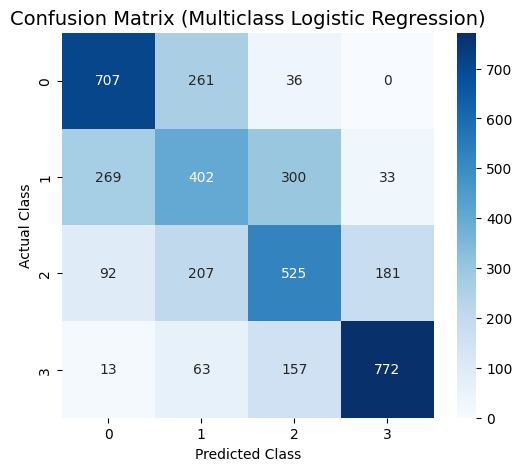

In [19]:
pred = softm.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)

print(test_cm)
print('정확도 :', round(test_acc*100, 2))

plt.figure(figsize=(6, 5))
sns.heatmap(
    test_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[0, 1, 2, 3],
    yticklabels=[0, 1, 2, 3]
)

plt.title("Confusion Matrix (Multiclass Logistic Regression)", fontsize=14)
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
softm.predict([x_test.iloc[-1, :]])

c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3])

In [ ]:
## 가장 마지막 인덱스에 값은 class가 0인 확률이 62%, 1인 확률은 31%, 2인 확률은 6%, 3인 확률은 0.1%
softm.predict_proba([x_test.iloc[-1, :]])

c:\Users\ekfla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.01516556, 0.12099807, 0.31988668, 0.54394969]])